<a href="https://colab.research.google.com/github/10nnyng/ESSA/blob/main/0325_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 전처리
- 결손값 (NaN,Null 값 허용 x) -> 다른 값으로 변환 ex) 피처의 평균값 or 드롭
- 문자열 값 -> 숫자형 변환 ex) 피처 벡터화 or 삭제

### 데이터 인코딩
- 레이블 인코딩 : 카테고리 피처를 코드형 숫자 값으로 변환하는 것

In [ ]:

from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','컴퓨터','선풍기','선풍기','믹서','믹서']

encoder = LabelEncoder()
encoder.fit(items)
labels=encoder.transform(items)
print('인코딩 변환값:', labels)

인코딩 변환값: [0 1 4 3 3 2 2]


In [ ]:
print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '컴퓨터']


In [ ]:
print('디코딩 원본값:', encoder.inverse_transform([4,2,0,1,1,3,3]))

디코딩 원본값: ['컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


- 원-핫 인코딩 : 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값 해당하는 칼럼에만 1 표시, 나머지 0 표시 ; 주의점: 숫자형 값이어야 만 함, 2차원 데이터가 필요

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 먼저 숫자값으로 변환해줌
encoder=LabelEncoder()
encoder.fit(items)
labels=encoder.transform(items)
# 2차원 데이터로 변환
labels= labels.reshape(-1,1)

# 원핫 인코딩 적용
oh_encoder=OneHotEncoder()
oh_encoder.fit(labels)
oh_labels= oh_encoder.transform(labels)
print('원핫 인코딩 데이터')
print(oh_labels.toarray())
print('원핫 인코딩 데이터 차원')
print(oh_labels.shape)

원핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원핫 인코딩 데이터 차원
(8, 6)


In [ ]:
import pandas as pd

df=pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


### 피처 스케일링과 정규화
- 피처 스케일링 : 서로 다른 변수 값 범위를 일정한 수준으로 맞추는 작업

- 표준화 : 가우시안 정규 분포로 변환
- 정규화 : 서로 다른 피처의 크기를 통일하기 위해 크기를 변환

- StandardScaler : 표준화 지원


In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

iris=load_iris()
iris_data= iris.data
iris_df= pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균값')
print(iris_df.mean())
print('\nfeature들의 분산 값')
print(iris_df.var())

feature 들의 평균값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 스케일 변환된 데이터 세트가 ndarray로 반환돼 이를 데이터프레임으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 평균값')
print(iris_df_scaled.mean())
print('\nfeature들의 분산값')
print(iris_df_scaled.var())

feature들의 평균값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


- MinMaxScaler : 0-1 범위 값으로 변환 ; 음수 값이 있으면 -1 - 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()
scaler.fit(iris_df)
iris_scaled= scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns= iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


### 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점
- Scaler 객체 이용 시 : fit : 데이터 변환 위한 기준 정보 설정, transform : 데이터 변환, fit_transform 메소드 이용

In [9]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

#학습 데이터는 0-10, 테스트 데이터는 0-5까지 값을 가지는 데이터 세트로 생성
# Scaler 클래스의 fit, transform 은 2차원 이상 데이터만 가능하므로, reshape(-1,1)로 차원 변경
train_array=np.arange(0,11).reshape(-1,1)
test_array=np.arange(0,6).reshape(-1,1)

# Scaler 객체에 별도의 feature_range 파라미터 지정하지 않으면 0 ~ 1로 변환
scaler=MinMaxScaler()
# fit()하게 되면 train_arrray데이터의 최솟값이 0, 최댓값이 10으로 설정
scaler.fit(train_array)
#1/10 scale 로 train_array 데이터 변환함. 원본 10->1 로 변환
train_scaled=scaler.transform(train_array) # 원본 : 10 -> 1로 변환

print('원본 train_array 데이터 :', np.round(train_array.reshape(-1),2))
print('Scale 된 train_array 데이터:',np.round(train_scaled.reshape(-1),2))

원본 train_array 데이터 : [ 0  1  2  3  4  5  6  7  8  9 10]
Scale 된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [10]:
#원본 데이터 0-5로 설정
scaler.fit(test_array)

#1/5scale로 변환. 원본 5->1로 변환
test_scaled = scaler.transform(test_array)

print('원본 test_array 데이터:', np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


In [11]:
scaler= MinMaxScaler()
scaler.fit(train_array)
train_scaled=scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1),2))

#test_Array에 Scale변환할 때는 반드시 fit 호출 x transform 만으로 변환
test_scaled =scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


# 사이킷런으로 수행하는 타이타닉 생존자 예측

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
titanic_df=pd.read_csv("/content/train.csv")
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [16]:
print('\n ## 학습 데이터 정보 ## \n')
print(titanic_df.info())


 ## 학습 데이터 정보 ## 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [17]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 개수', titanic_df.isna().sum())

데이터 세트 Null 값 개수 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [18]:
print('Sex 값 분포:\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포:\n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포: \n', titanic_df['Embarked'].value_counts())

Sex 값 분포:
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포:
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포: 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [19]:
# Cabin값 정리
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [20]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

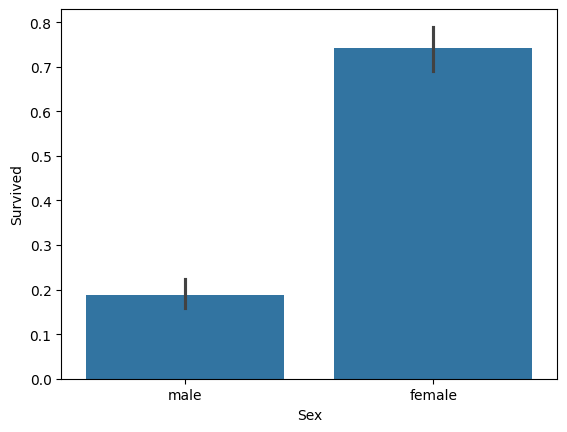

In [21]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

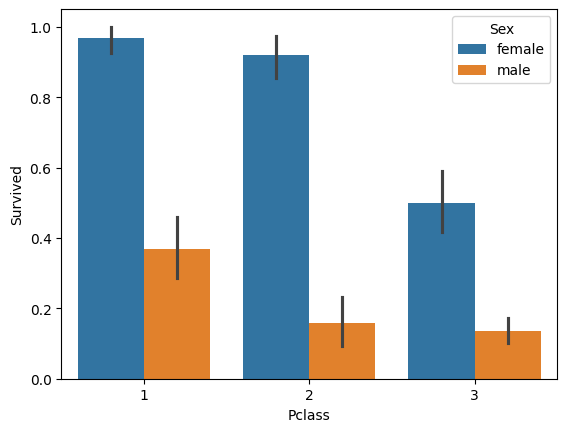

In [22]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data= titanic_df)

In [27]:
def get_category(age):
  cat=''
  if age<=1 : cat='Unknown'
  elif age<=5: cat='Baby'
  elif age<= 12: cat='Child'
  elif age<=18: cat='Teenager'
  elif age<=25: cat='Student'
  elif age<=35: cat='Young Adult'
  elif age<=60: cat='Adult'
  else : cat= 'Elderly'
  return cat

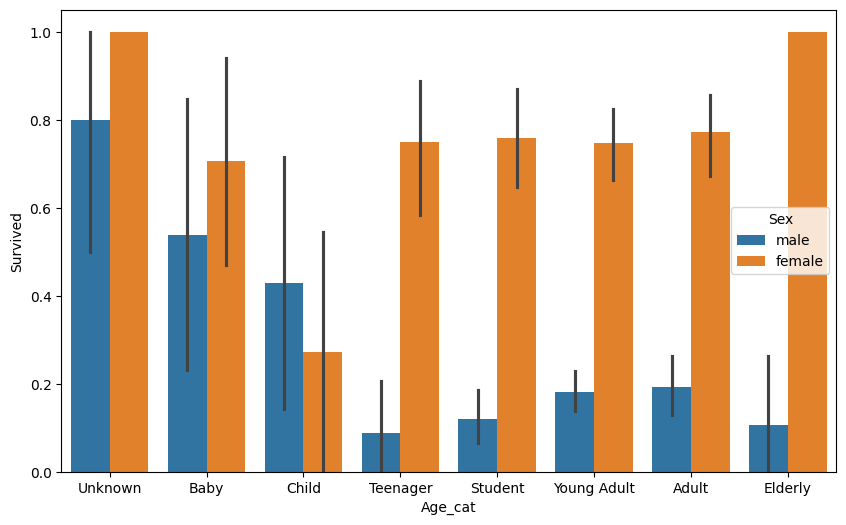

In [28]:
#막대그래프의 크기 figure 더 크게 설정
plt.figure(figsize=(10,6))

#X축 값 순차적 표시
group_names=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

# lmabda 식에 위에서 생성한 get_category ()함수를 반환값으로 지정
#get_category(X) 입력값으로 'Age' 칼럽 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [29]:
from sklearn import preprocessing

def encode_features(dataDF):
  features=['Cabin','Sex','Embarked']
  for feature in features:
    le = preprocessing.LabelEncoder()
    le=le.fit(dataDF[feature])
    dataDF[feature]=le.transform(dataDF[feature])

  return dataDF

titanic_df=encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [30]:
# Null 처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace=True)
  df['Embarked'].fillna('N', inplace=True)
  df['Fare'].fillna(0, inplace=True)
  return df

#불필요한 속성 제거
def drop_features(df):
  df.drop(['PassengerId', 'Name','Ticket'], axis=1, inplace=True)
  return df

#레이블 인코딩 수행
def format_features(df):
  df['Cabin']= df['Cabin'].str[:1]
  features =['Cabin','Sex','Embarked']
  for feature in features:
    le=LabelEncoder()
    le= le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

#데이터 전처리 함수 호출
def transform_features(df):
  df= fillna(df)
  df=drop_features(df)
  df=format_features(df)
  return df

In [31]:
# 원본 데이터 재로딩 후 피처 데이터 세트와 레이블 데이터 세트 추출
titanic_df=pd.read_csv("/content/train.csv")
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived', axis=1)

In [32]:
X_titanic_df =transform_features(X_titanic_df)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size=0.2, random_state=11)

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 클래스생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DTC 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred= dt_clf.predict(X_test)
print('DT 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RFC
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RF 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LR
lr_clf.fit(X_train, y_train)
lr_pred= lr_clf.predict(X_test)
print('로지스틱 정확도 : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DT 정확도 : 0.7877
RF 정확도 : 0.8547
로지스틱 정확도 : 0.8492


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
# 교차검증
# KFold

from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
  #폴드 세트 5개인 KFold 객체 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성
  kfold = KFold(n_splits=folds)
  scores=[]
# 교차 검증 수행
  for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
    X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
    y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

    clf.fit(X_train, y_train)
    predictions= clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)

    print('교차 검증 {0} 정확도 : {1:.4f}'.format(iter_count, accuracy))

#5개 fold에서의 평균 정확도 계산
  mean_score= np.mean(scores)
  print('평균 정확도: {0:.4f}',format(mean_score))

exec_kfold(dt_clf,folds=5)

교차 검증 0 정확도 : 0.7542
교차 검증 1 정확도 : 0.7809
교차 검증 2 정확도 : 0.7865
교차 검증 3 정확도 : 0.7697
교차 검증 4 정확도 : 0.8202
평균 정확도: {0:.4f} 0.782298662984119


In [37]:
# cross_val_score

from sklearn.model_selection import cross_val_score

scores=cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
  print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))

print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


In [38]:
from sklearn.model_selection import GridSearchCV

parameters={'max_depth':[2,3,5,10],
       'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSeachCV 최적 하이퍼파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

#최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서 DT 정확도: {0:.4f}'.format(accuracy))

GridSeachCV 최적 하이퍼파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서 DT 정확도: 0.8715
